In [1]:
import platform
import os
from datetime import datetime

import numpy as np
from matplotlib import pyplot as plt

from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector

In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 5  # Number of files to process at once
elif platform.system() == 'Linux':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 0.2  # Number of files to process at once
else:
    raise OSError('Unknown platform')

run_name = 'ip1_fe55_selftrig_3-12-25'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'hv_450'

det_single = 'inter_plein_1'

# file_nums = [0]
file_nums = 'all'

noise_threshold_sigmas = 3

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'

try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [3]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [4]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')

print(f'Detector center: {det.center}')
print(f'Detector active size: {det.active_size}')

# det.load_dream_data(data_dir, ped_dir, noise_threshold_sigmas, file_nums, chunk_size, hist_raw_amps=True, save_waveforms=True)
det.load_dream_data(data_dir, ped_dir, noise_threshold_sigmas, file_nums, chunk_size, hist_raw_amps=True, save_waveforms=False)
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 6
FEU Channels: [1, 2, 3, 4]
HV: {'drift': 800, 'resist_2': 450}
Detector center: [  9.2  38.4 712.7]
Detector active size: [127.125 127.      4.   ]
Reading in data...


100%|██████████| 5/5 [00:50<00:00, 10.08s/it]


Read in data shape: (130606, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:01<00:00,  7.53it/s]


Fitting time: 2.334763288497925 s
Processed sub-chunk 1/1
Processed chunk 1/2


100%|██████████| 2/2 [00:25<00:00, 12.99s/it]


Read in data shape: (45471, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 22.35it/s]


Fitting time: 1.087470293045044 s
Processed sub-chunk 1/1
Processed chunk 2/2
Getting hits...
Hits shape: (176077, 256)


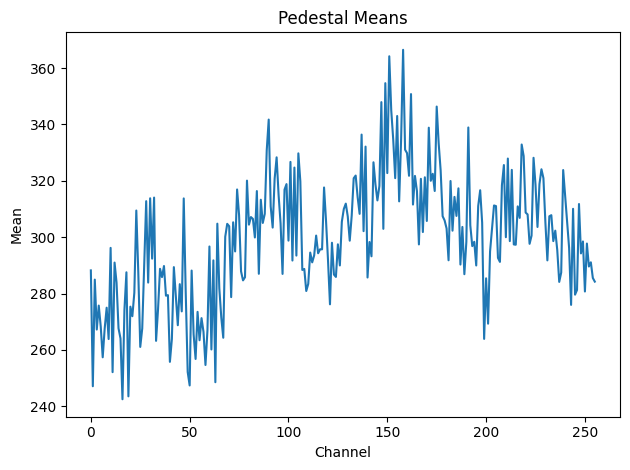

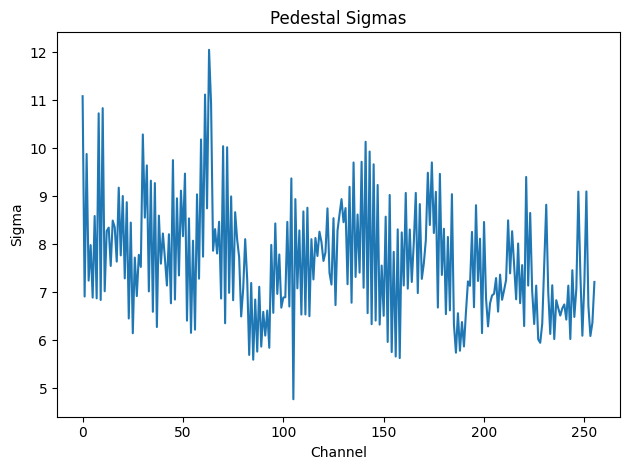

In [5]:
det.dream_data.plot_pedestals()

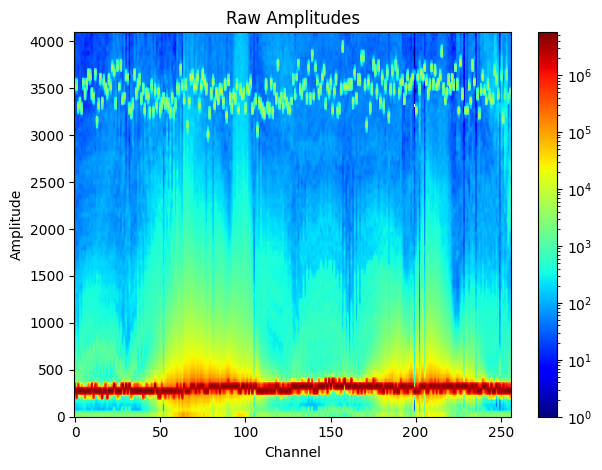

In [6]:
det.dream_data.plot_raw_amps_2d_hist()

In [7]:
# for event_num in range(min(len(det.dream_data.hits), 20)):
    # det.plot_event_1d(event_num)
    # det.plot_event_2d(event_num)
    # det.dream_data.plot_waveforms(event_num)

In [8]:
# det.dream_data.plot_noise_metric()

Connector 1 Dead Strips: []
Connector 2 Dead Strips: []
Connector 3 Dead Strips: []
Connector 4 Dead Strips: []


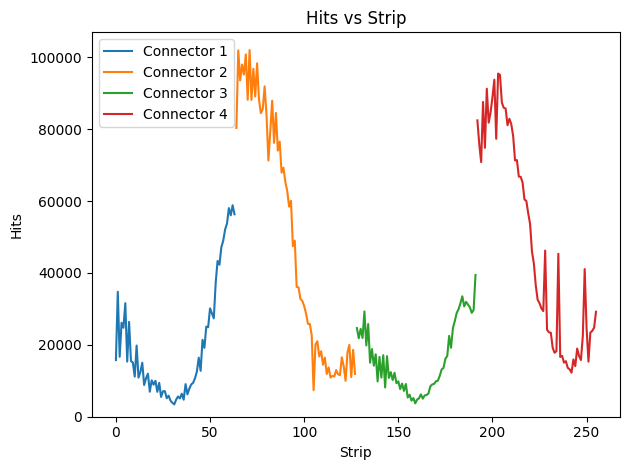

In [9]:
det.dream_data.plot_hits_vs_strip(print_dead_strips=True)

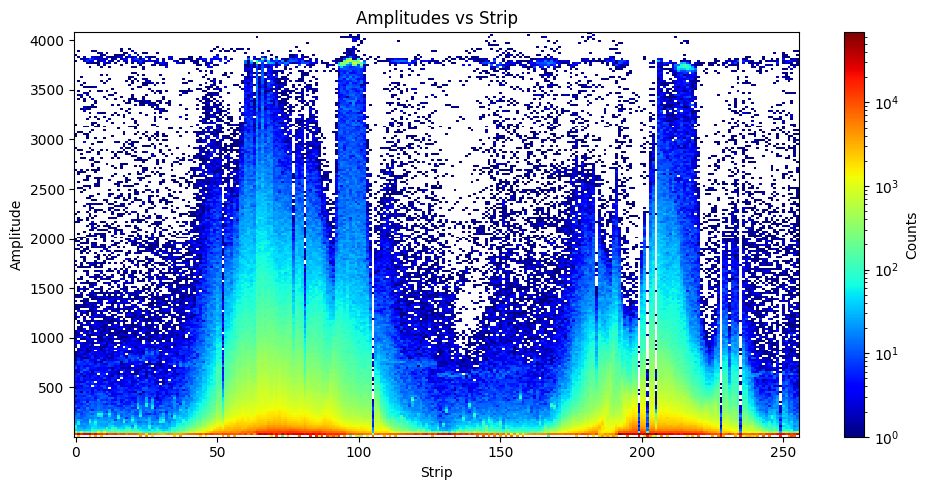

In [10]:
det.dream_data.plot_amplitudes_vs_strip()

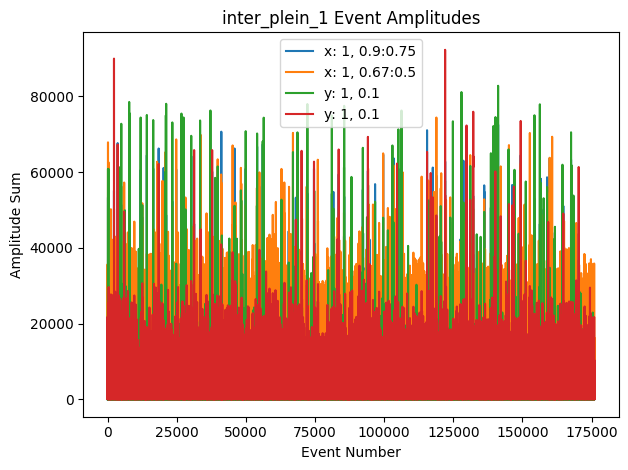

In [11]:
det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

# if realign_dream:
#     det.add_rotation(90, 'z')

C:\Users\Dylan\PycharmProjects\saclay_micromegas\Detector_Classes\DreamDetector.py:659: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()


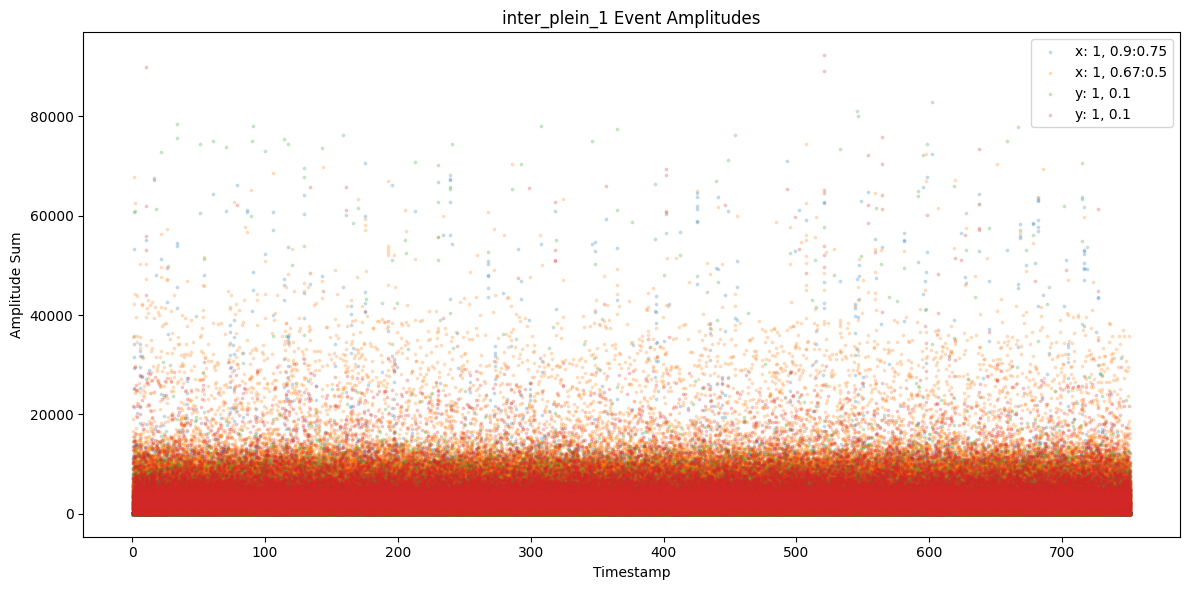

In [12]:
start_date_time = datetime(2025, 2, 27, 17, 25)
# det.plot_xy_amp_sum_vs_timestamp(x_range=(0, 2.7e13 / 1e8), t_start=start_date_time)
det.plot_xy_amp_sum_vs_timestamp()
# det.plot_xy_amp_sum_vs_timestamp(t_start=start_date_time)

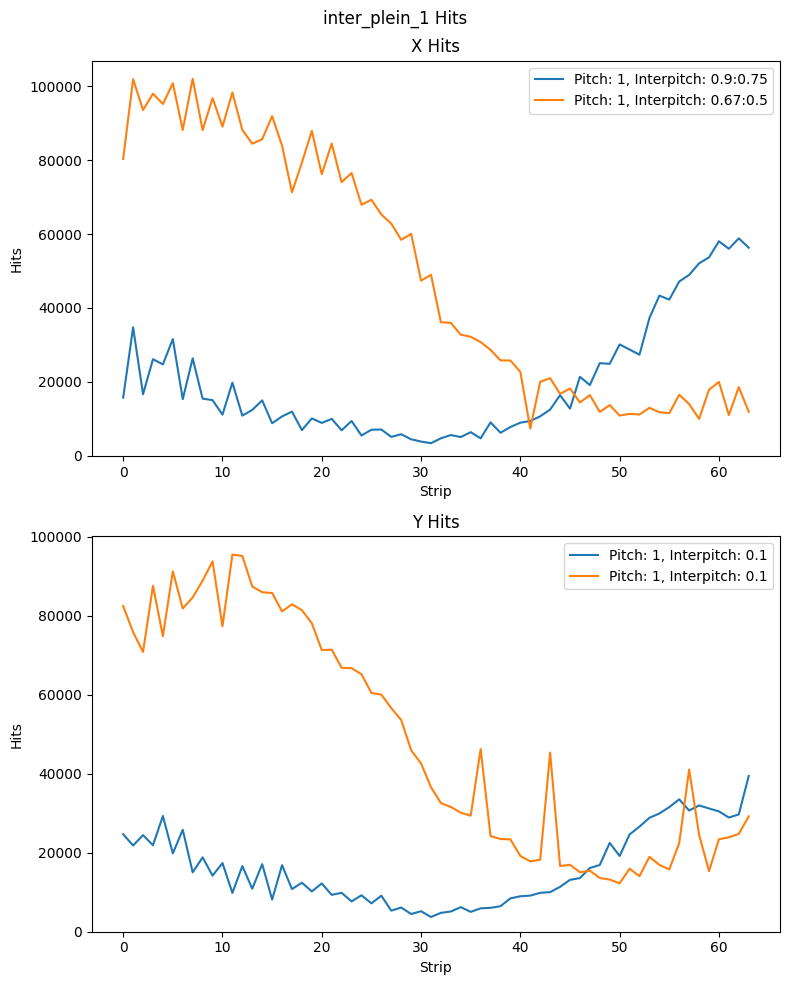

In [13]:
det.plot_hits_1d()

In [14]:
print(len(det.dream_data.hits))

176077


In [15]:
# for event_num in range(min(len(det.dream_data.hits), 2)):
#     det.plot_event_1d(event_num)
#     det.plot_event_2d(event_num)
#     det.dream_data.plot_waveforms(event_num)

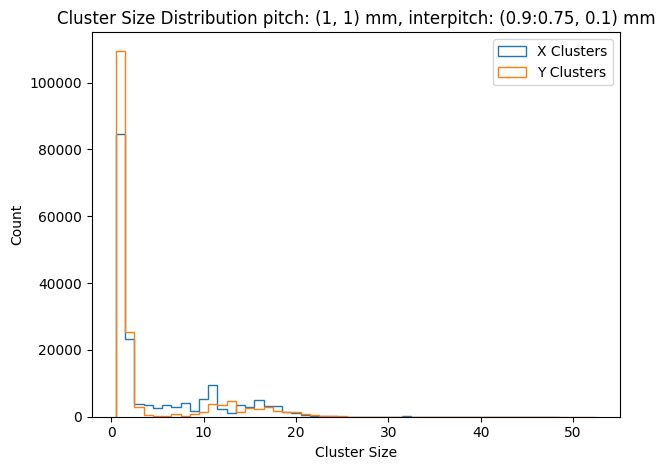

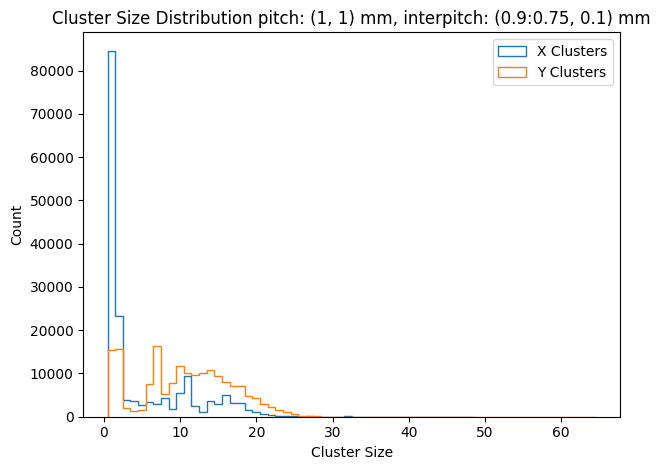

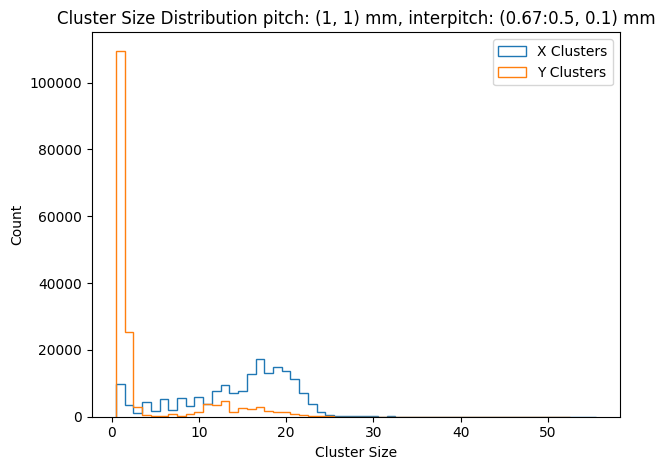

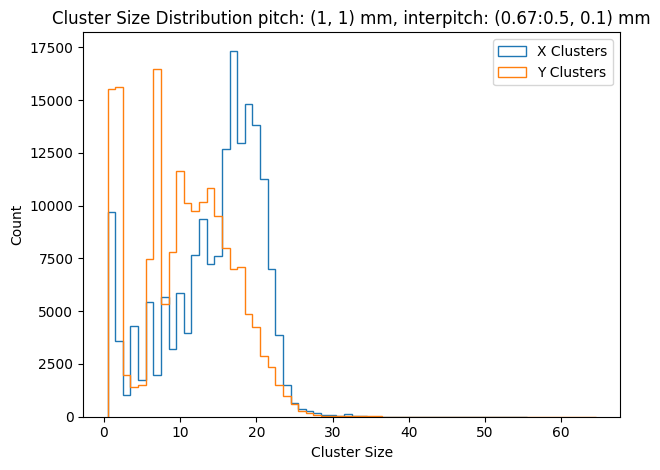

In [16]:
for sub_det in det.sub_detectors:
    sub_det.plot_cluster_sizes()

In [17]:
det.get_det_clusters()

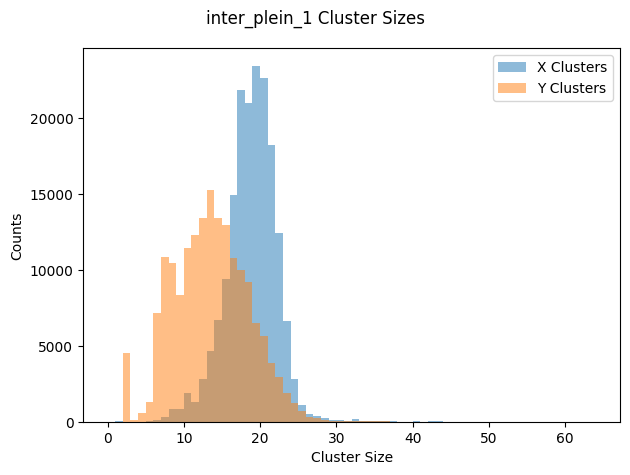

In [18]:
det.plot_cluster_sizes()

(176077,)


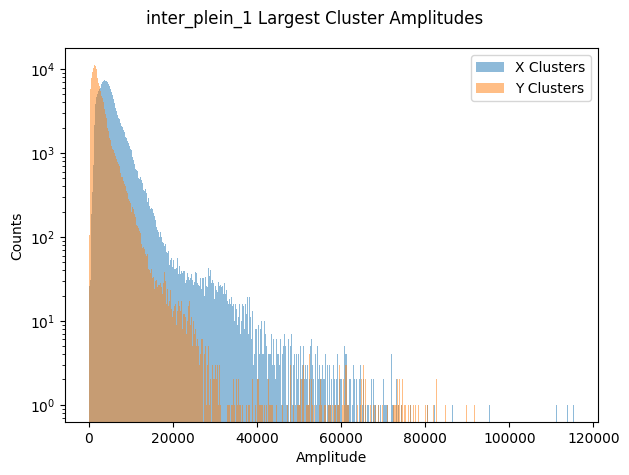

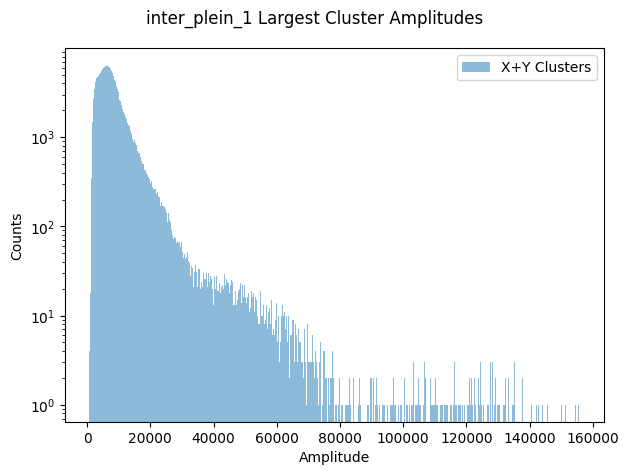

In [19]:
det.plot_cluster_amps()

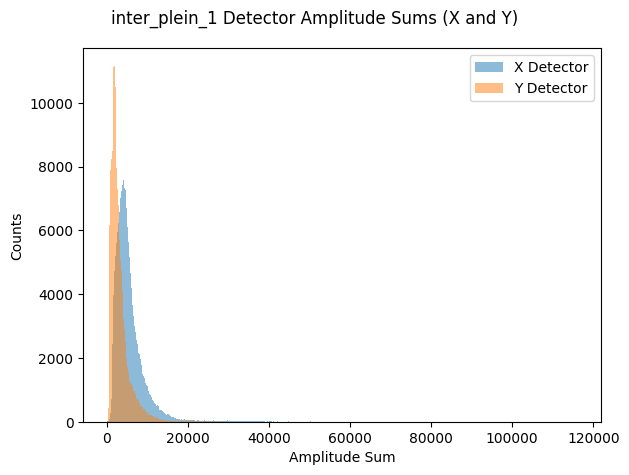

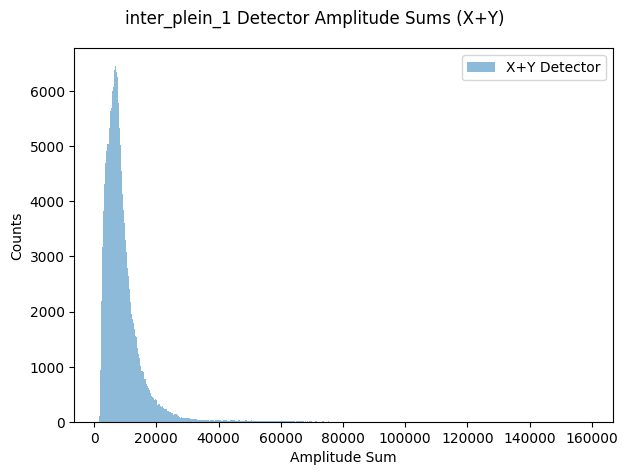

In [20]:
det.plot_det_amp_sums()

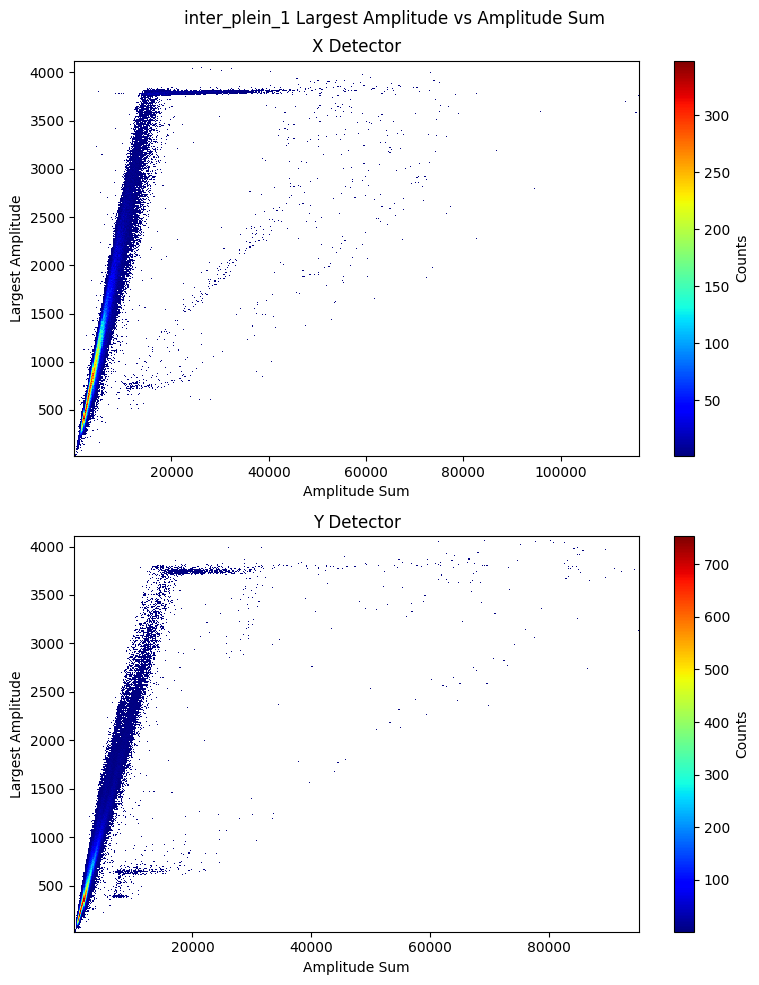

In [21]:
det.plot_det_largest_amp_vs_amp_sums(bins=500)

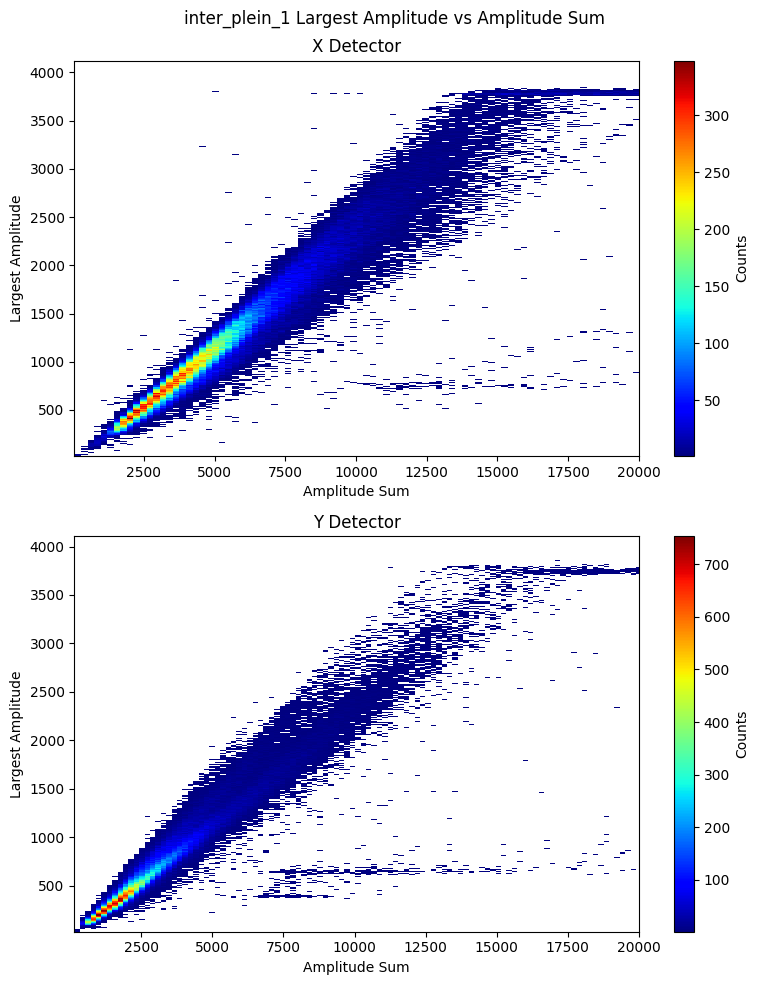

In [22]:
det.plot_det_largest_amp_vs_amp_sums(bins=500, x_max=20000)

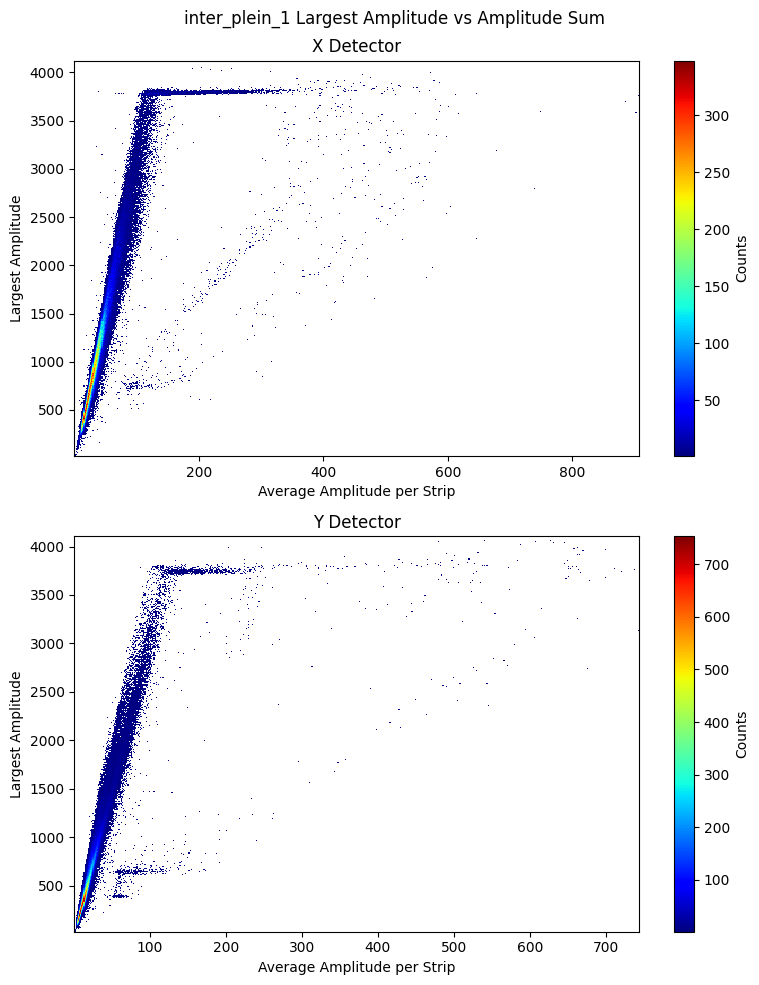

In [23]:
det.plot_det_largest_amp_vs_amp_sums(bins=500, norm_per_strip=True)

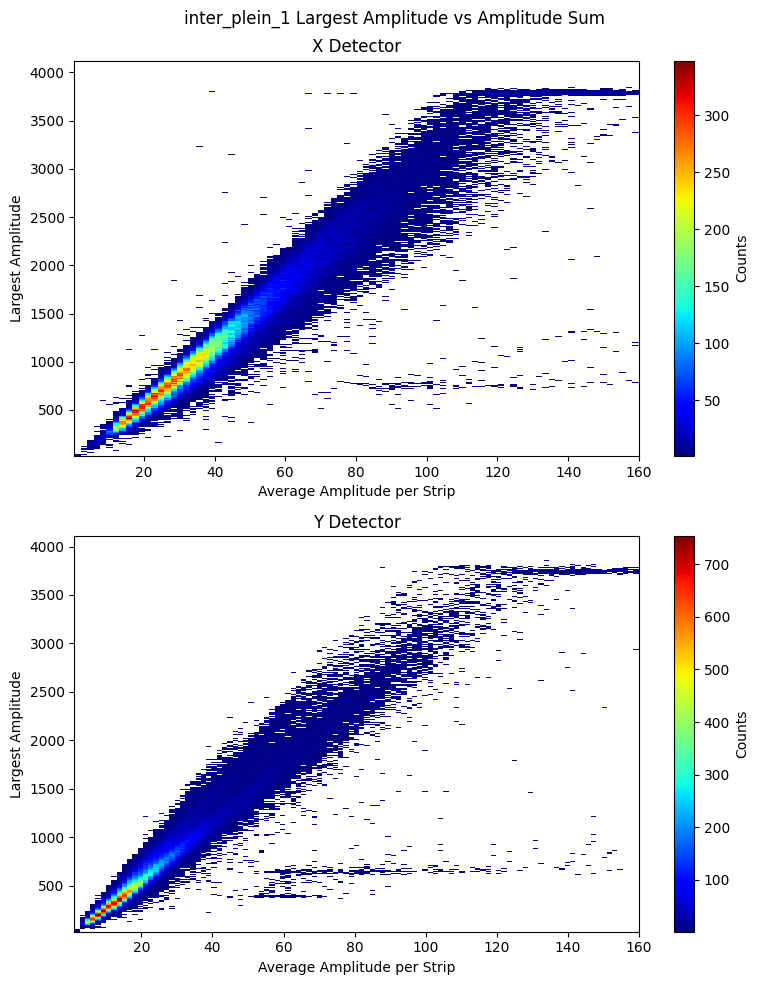

In [24]:
det.plot_det_largest_amp_vs_amp_sums(bins=500, x_max=160, norm_per_strip=True)

In [25]:
from scipy.optimize import curve_fit as cf
def gaus(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

HV: {'drift': 800, 'resist_2': 420}
Reading in data...


100%|██████████| 5/5 [00:21<00:00,  4.29s/it]


Read in data shape: (115268, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:01<00:00,  8.42it/s]


Fitting time: 2.141571283340454 s
Processed sub-chunk 1/1
Processed chunk 1/1
Getting hits...
HV: hv_420 sum of sums: 398229258.0297984
p0: [16907.0, 2754.9991890270703, 358.14989457351913]
HV: {'drift': 800, 'resist_2': 425}
Reading in data...


100%|██████████| 5/5 [00:22<00:00,  4.41s/it]


Read in data shape: (130296, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:01<00:00,  7.63it/s]


Fitting time: 2.3688127994537354 s
Processed sub-chunk 1/1
Processed chunk 1/2


100%|██████████| 1/1 [00:05<00:00,  5.84s/it]


Read in data shape: (11122, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 119.48it/s]


Fitting time: 0.38720154762268066 s
Processed sub-chunk 1/1
Processed chunk 2/2
Getting hits...
HV: hv_425 sum of sums: 547444479.603076
p0: [16434.0, 2847.9925614193494, 370.23903298451546]
HV: {'drift': 800, 'resist_2': 430}
Reading in data...


100%|██████████| 5/5 [00:20<00:00,  4.18s/it]


Read in data shape: (130556, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:01<00:00,  7.68it/s]


Fitting time: 2.3634257316589355 s
Processed sub-chunk 1/1
Processed chunk 1/2


100%|██████████| 2/2 [00:13<00:00,  6.81s/it]


Read in data shape: (28964, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 35.96it/s]


Fitting time: 0.921818733215332 s
Processed sub-chunk 1/1
Processed chunk 2/2
Getting hits...
HV: hv_430 sum of sums: 711567651.7999623
p0: [18787.0, 3313.109735630258, 430.70426563193354]
HV: {'drift': 800, 'resist_2': 435}
Reading in data...


100%|██████████| 5/5 [00:22<00:00,  4.56s/it]


Read in data shape: (130612, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:01<00:00,  7.60it/s]


Fitting time: 2.3785722255706787 s
Processed sub-chunk 1/1
Processed chunk 1/2


100%|██████████| 2/2 [00:14<00:00,  7.03s/it]


Read in data shape: (37420, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 31.60it/s]


Fitting time: 0.9048953056335449 s
Processed sub-chunk 1/1
Processed chunk 2/2
Getting hits...
HV: hv_435 sum of sums: 877098478.2266475
p0: [13489.0, 3966.934067329021, 515.7014287527728]
HV: {'drift': 800, 'resist_2': 440}
Reading in data...


100%|██████████| 5/5 [00:22<00:00,  4.57s/it]


Read in data shape: (130325, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:02<00:00,  7.46it/s]


Fitting time: 2.423612356185913 s
Processed sub-chunk 1/1
Processed chunk 1/2


100%|██████████| 2/2 [00:14<00:00,  7.11s/it]


Read in data shape: (42673, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 25.99it/s]


Fitting time: 0.9444210529327393 s
Processed sub-chunk 1/1
Processed chunk 2/2
Getting hits...
HV: hv_440 sum of sums: 1067359404.5223424
p0: [11130.0, 4344.569766537695, 564.7940696499003]
HV: {'drift': 800, 'resist_2': 445}
Reading in data...


100%|██████████| 5/5 [00:21<00:00,  4.22s/it]


Read in data shape: (130605, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:01<00:00,  7.82it/s]


Fitting time: 2.301501750946045 s
Processed sub-chunk 1/1
Processed chunk 1/2


100%|██████████| 2/2 [00:14<00:00,  7.11s/it]


Read in data shape: (44135, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 23.39it/s]


Fitting time: 1.2239527702331543 s
Processed sub-chunk 1/1
Processed chunk 2/2
Getting hits...
HV: hv_445 sum of sums: 1293615302.763157
p0: [8771.0, 5389.171038776509, 700.5922350409462]
HV: {'drift': 800, 'resist_2': 450}
Reading in data...


100%|██████████| 5/5 [00:21<00:00,  4.25s/it]


Read in data shape: (130606, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:01<00:00,  7.51it/s]


Fitting time: 2.4087674617767334 s
Processed sub-chunk 1/1
Processed chunk 1/2


100%|██████████| 2/2 [00:16<00:00,  8.20s/it]


Read in data shape: (45471, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 23.98it/s]


Fitting time: 1.2365343570709229 s
Processed sub-chunk 1/1
Processed chunk 2/2
Getting hits...
HV: hv_450 sum of sums: 1603100887.9725356
p0: [6454.0, 6754.307210773613, 878.0599374005698]


Text(0, 0.5, 'Number of Events')

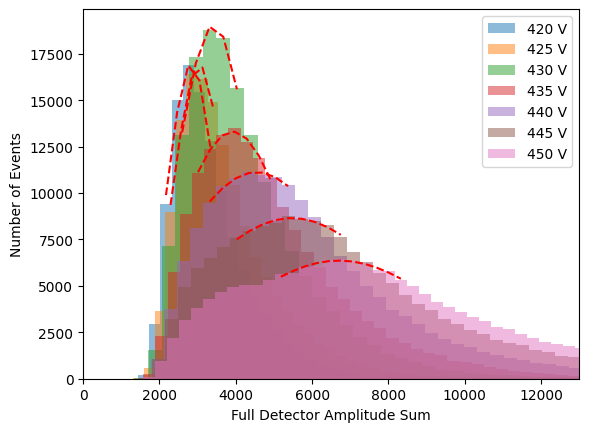

In [26]:
hvs = [420, 425, 430, 435, 440, 445, 450]
binning = np.arange(0, 13000, 50)
# hvs = [435, 450]
means, mean_x_largest_amp, mean_y_largest_amp = [], [], []
fig, ax = plt.subplots()
for hv in hvs:
    sub_run_name = f'hv_{hv}'
    data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
    ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'

    det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
    det = DreamDetector(config=det_config)
    print(f'HV: {det.hv}')

    det.load_dream_data(data_dir, ped_dir, noise_threshold_sigmas, file_nums, chunk_size, hist_raw_amps=False, save_waveforms=False)
    det.make_sub_detectors()
    det.get_det_clusters()
    x_largest_amp = np.array(det.x_largest_amp)
    y_largest_amp = np.array(det.y_largest_amp)
    xy_det_sum = np.array(det.xy_det_sum)
    print(f'HV: {sub_run_name} sum of sums: {np.sum(xy_det_sum)}')
    hist, bin_edges, _ = ax.hist(xy_det_sum, bins=500, alpha=0.5, label=f'{hv} V')
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    p0 = [np.max(hist), bin_centers[np.argmax(hist)], bin_centers[np.argmax(hist)] * 0.13]
    print(f'p0: {p0}')
    fit_range = [p0[1] - 2 * p0[2], p0[1] + 2 * p0[2]]
    fit_filter = (bin_centers > fit_range[0]) & (bin_centers < fit_range[-1])
    x_fit, y_fit = bin_centers[fit_filter], hist[fit_filter]
    popt, pcov = cf(gaus, x_fit, y_fit, p0=p0)
    ax.plot(x_fit, gaus(x_fit, *popt), '--', color='r')

    means.append(popt[1])
    xy_det_sum_filter = (xy_det_sum > fit_range[0]) & (xy_det_sum < fit_range[1])
    mean_x_largest_amp.append(np.median(x_largest_amp[xy_det_sum_filter]))
    mean_y_largest_amp.append(np.median(y_largest_amp[xy_det_sum_filter]))

ax.legend()
ax.set_xlim(0, 13000)
ax.set_xlabel('Full Detector Amplitude Sum')
ax.set_ylabel('Number of Events')

[2834.0760913955496, 3035.8348551865715, 3417.6366493806663, 3917.793471004169, 4542.955745255295, 5476.082937125289, 6705.588857569045]
[420, 425, 430, 435, 440, 445, 450]


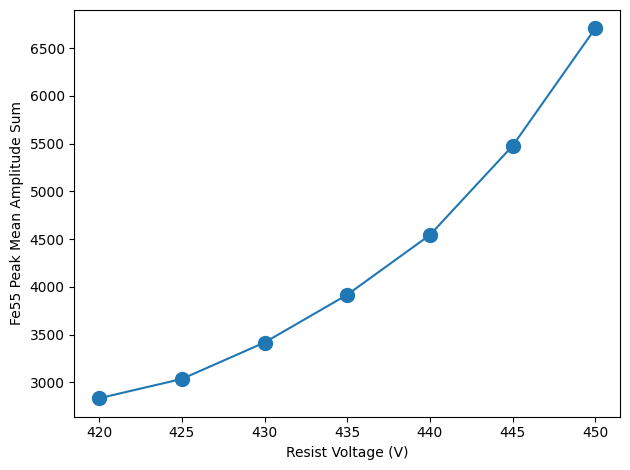

In [27]:
fig_means, ax_means = plt.subplots()
ax_means.clear()
print(means)
print(hvs)
ax_means.plot(hvs, means, marker='o', markersize=10)
ax_means.set_xlabel('Resist Voltage (V)')
ax_means.set_ylabel('Fe55 Peak Mean Amplitude Sum')
fig_means.tight_layout()

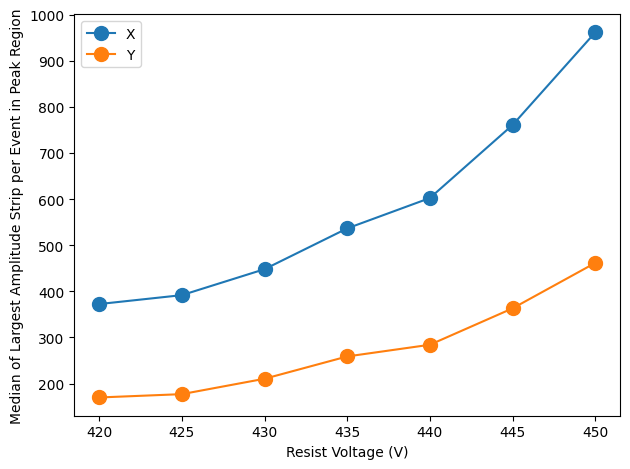

In [28]:
fig_largest_amps, ax_largest_amps = plt.subplots()
ax_largest_amps.clear()
ax_largest_amps.plot(hvs, mean_x_largest_amp, marker='o', markersize=10, label='X')
ax_largest_amps.plot(hvs, mean_y_largest_amp, marker='o', markersize=10, label='Y')
ax_largest_amps.set_xlabel('Resist Voltage (V)')
ax_largest_amps.set_ylabel('Median of Largest Amplitude Strip per Event in Peak Region')
ax_largest_amps.legend()
fig_largest_amps.tight_layout()